In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df_future = pd.read_csv('Final data.csv').drop(columns=["CPI","Population Estimate","Grants"])

In [3]:
df_future

,Date,Median Annual Income,Petrol Price,Diesel Price,Google Search Index,All Cars,ULEV,Charging Points
0,2011-10-31,26719.28962,1.3473,1.4027,23.0,206427.0,31.0,0.0
1,2011-11-30,26652.97814,1.3317,1.4110,22.0,207544.0,31.0,0.0
2,2011-12-31,26584.45628,1.3241,1.4077,12.0,208700.0,31.0,0.0
3,2012-01-31,26515.93443,1.3410,1.4245,21.0,209690.0,31.0,0.0
4,2012-02-29,26451.83333,1.3621,1.4392,26.0,210618.0,33.0,0.0
...,...,...,...,...,...,...,...,...
190,2027-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2027-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2027-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2027-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_future['Date']=pd.to_datetime(df_future['Date'])

In [5]:
df_future.set_index('Date', inplace=True)

In [6]:
df_future.isna().sum()

Median Annual Income    80
Petrol Price            77
Diesel Price            77
Google Search Index     77
All Cars                84
ULEV                    77
Charging Points         77
dtype: int64

In [7]:
df=df_future.dropna()

In [8]:
df

,Median Annual Income,Petrol Price,Diesel Price,Google Search Index,All Cars,ULEV,Charging Points
Date,,,,,,,
2011-10-31,26719.28962,1.3473,1.4027,23.0,206427.0,31.0,0.0
2011-11-30,26652.97814,1.3317,1.4110,22.0,207544.0,31.0,0.0
2011-12-31,26584.45628,1.3241,1.4077,12.0,208700.0,31.0,0.0
2012-01-31,26515.93443,1.3410,1.4245,21.0,209690.0,31.0,0.0
2012-02-29,26451.83333,1.3621,1.4392,26.0,210618.0,33.0,0.0
...,...,...,...,...,...,...,...
2020-08-31,32819.57260,1.1329,1.1818,65.0,182533.0,1719.0,64.0
2020-09-30,32779.95616,1.1330,1.1814,79.0,182451.0,1795.0,67.0
2020-10-31,32739.01918,1.1314,1.1808,72.0,182366.0,1874.0,71.0


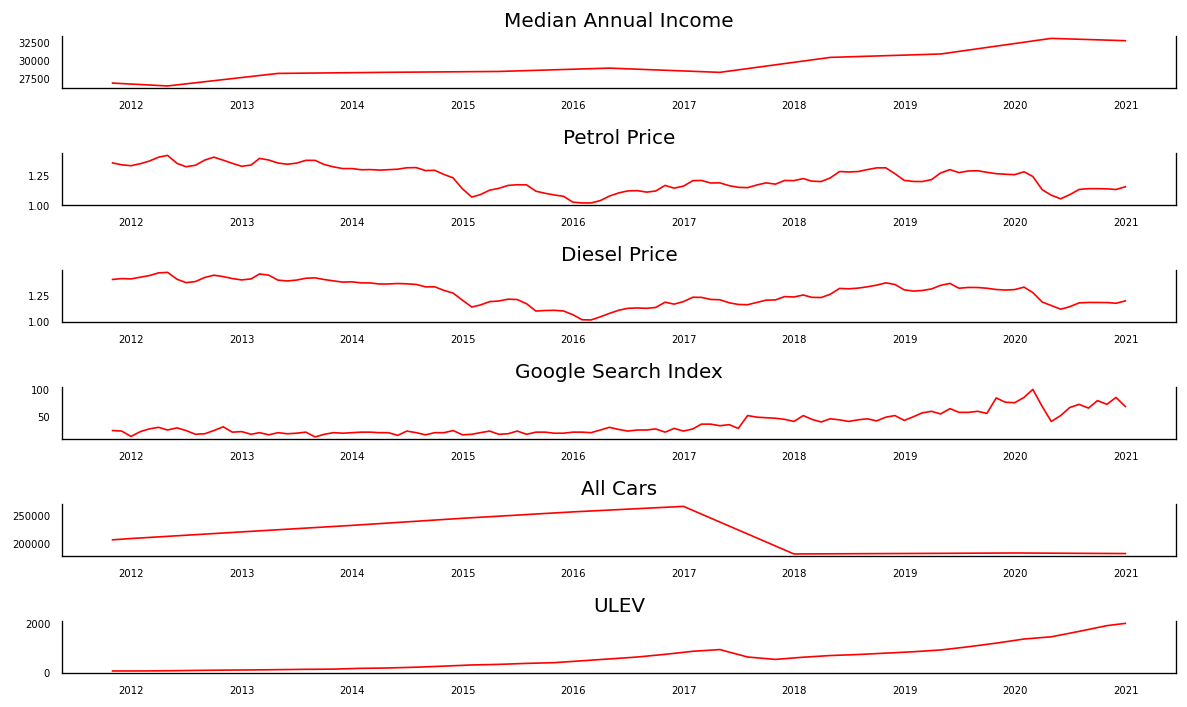

In [9]:
fig, axes = plt.subplots(nrows=6, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)        


,Median Annual Income_x,Petrol Price_x,Diesel Price_x,Google Search Index_x,All Cars_x,ULEV_x,Charging Points_x
Median Annual Income_y,1.0000,0.0013,0.0041,0.0000,0.0000,0.0121,0.0126
Petrol Price_y,0.0639,1.0000,0.0525,0.2123,0.3445,0.2109,0.0176
Diesel Price_y,0.2540,0.3312,1.0000,0.1988,0.1441,0.2902,0.1038
Google Search Index_y,0.0001,0.0038,0.0059,1.0000,0.0293,0.0001,0.0000
All Cars_y,0.0000,0.0001,0.0000,0.0026,1.0000,0.0000,0.4345
ULEV_y,0.0001,0.1496,0.0154,0.0334,0.0000,1.0000,0.0005
Charging Points_y,0.0000,0.2294,0.0793,0.0000,0.0000,0.0007,1.0000


In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Median Annual Income ::  245.83    > 111.7797  =>   True
Petrol Price ::  149.67    > 83.9383   =>   True
Diesel Price ::  103.0     > 60.0627   =>   True
Google Search Index ::  67.45     > 40.1749   =>   True
All Cars ::  33.45     > 24.2761   =>   True
ULEV   ::  12.95     > 12.3212   =>   True
Charging Points ::  0.0       > 4.1296    =>   False


In [12]:
df.shape

(111, 7)

In [13]:
nobs = 18
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(93, 7)
(18, 7)


In [14]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    


In [15]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Median Annual Income" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.4762
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.8966. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Petrol Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5951
 No. Lags Chosen       = 2
 Critical value 1%     = -3.505
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.4861. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Diesel Price" 
    -----------------------------------------------
 N

In [16]:
#1st differentiation
df_differenced = df_train.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Median Annual Income" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0013
 No. Lags Chosen       = 12
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.7528. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Petrol Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9879
 No. Lags Chosen       = 1
 Critical value 1%     = -3.505
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Diesel Price" 
    -----------------------------------------------
 Null Hypothesis: Data has

In [17]:
#2nd differentiation
df_differenced = df_differenced.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Median Annual Income" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.2743
 No. Lags Chosen       = 11
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Petrol Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.474
 No. Lags Chosen       = 9
 Critical value 1%     = -3.514
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Diesel Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

In [18]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  13.708272602053281
BIC :  15.26370973025878
FPE :  901275.063995447
HQIC:  14.335516282550602 

Lag Order = 2
AIC :  13.785736131587164
BIC :  16.72176780374306
FPE :  992980.4066375697
HQIC:  14.969166242531006 

Lag Order = 3
AIC :  13.903671082403708
BIC :  18.23901050774057
FPE :  1178143.495702896
HQIC:  15.650270512541837 

Lag Order = 4
AIC :  13.451215030865466
BIC :  19.205000641059492
FPE :  836162.8151915974
HQIC:  15.768087069396337 

Lag Order = 5
AIC :  13.61119271265973
BIC :  20.803001069123496
FPE :  1196263.936115108
HQIC:  16.505562387815182 

Lag Order = 6
AIC :  11.881463370350533
BIC :  20.531322525686832
FPE :  296450.32594466856
HQIC:  15.36067865858669 

Lag Order = 7
AIC :  12.151938404069579
BIC :  22.280341732583384
FPE :  672636.2674293128
HQIC:  16.223471287675693 



C:\Users\anich\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [19]:
model_fitted = model.fit(4)
model_fitted.summary()
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col,':', round(val, 2))

Median Annual Income : 1.8
Petrol Price : 2.0
Diesel Price : 2.01
Google Search Index : 2.11
All Cars : 1.84
ULEV : 1.8
Charging Points : 1.9


In [20]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 3

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[ 3.9287700e+00,  1.6800000e-02,  9.3000000e-03, -4.0000000e+00,
         7.0000000e+00,  3.0000000e+00,  0.0000000e+00],
       [-1.3095900e+00,  3.9200000e-02,  1.9600000e-02, -8.0000000e+00,
        -2.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [ 1.4595003e+02, -2.7500000e-02, -1.6000000e-02,  1.5000000e+01,
         3.0000000e+00,  2.0000000e+01,  1.0000000e+00],
       [-5.9754000e+00, -5.2600000e-02, -6.4900000e-02, -1.7000000e+01,
        -3.0000000e+00, -2.0000000e+00, -1.0000000e+00]])

In [21]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Median Annual Income_2d,Petrol Price_2d,Diesel Price_2d,Google Search Index_2d,All Cars_2d,ULEV_2d,Charging Points_2d
Date,,,,,,,
2019-07-31,9.567168,0.038766,0.039320,8.779927,1061.327900,1.833603,0.250034
2019-08-31,-30.290817,0.033227,0.037051,-4.424148,-709.796266,13.770178,0.007829
2019-09-30,76.399046,-0.009741,-0.009009,9.532660,581.262742,-3.407000,0.268104
2019-10-31,-70.825048,-0.021272,-0.022005,-13.262956,-114.759866,0.066883,-0.534904
2019-11-30,-1.890903,-0.002689,-0.002199,7.784746,134.146719,10.058617,0.307569
2019-12-31,10.242892,0.007327,0.001683,-0.724405,-621.984374,3.040426,0.032371
2020-01-31,4.675664,0.003843,0.008782,-0.294901,365.000515,-4.580514,0.159144
2020-02-29,-31.556007,-0.006211,-0.006302,-3.092954,54.901895,-6.192383,-0.211295
2020-03-31,26.578386,0.003317,0.004736,4.055731,98.163826,5.267080,0.209244


In [22]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

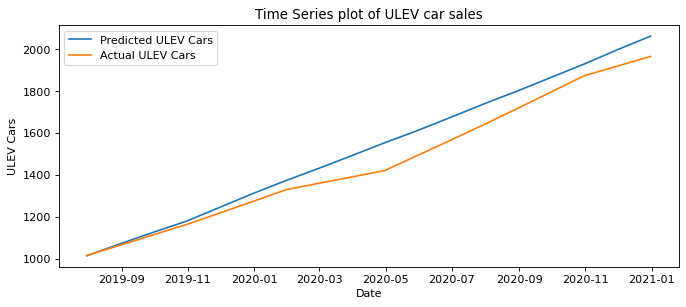

In [23]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Median Annual Income_forecast','Petrol Price_forecast','Diesel Price_forecast','Google Search Index_forecast', 'All Cars_forecast','ULEV_forecast']]
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10,4), dpi=80)
plt.plot((df_results["ULEV_forecast"]).astype(int))
plt.plot(df_test["ULEV"][-nobs:])
plt.xlabel("Date")
plt.ylabel("ULEV Cars")
plt.title("Time Series plot of ULEV car sales")
plt.legend(['Predicted ULEV Cars', 'Actual ULEV Cars'])

In [24]:
preds=(df_results["ULEV_forecast"]).astype(int)
y_values=df["ULEV"][-18:]

In [25]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_values, preds), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_values, preds), 2)) 

R2 score = 0.93
Mean absolute error = 64.61


PREDICTING ULEV CAR SALES till 2026:

In [26]:
fc = model_fitted.forecast(y=forecast_input, steps=102)
df_forecast_2027 = pd.DataFrame(fc, index=df_future.index[-102:], columns=df_future.columns + '_2d')
df_results = invert_transformation(df_train, df_forecast_2027, second_diff=True)        
df_results['ULEV_forecast']


Date
2019-07-31     1013.833603
2019-08-31     1071.437384
2019-09-30     1125.634165
2019-10-31     1179.897828
2019-11-30     1244.220109
                  ...     
2027-08-31     9597.004891
2027-09-30     9719.036203
2027-10-31     9841.755434
2027-11-30     9965.162526
2027-12-31    10089.257479
Name: ULEV_forecast, Length: 102, dtype: float64

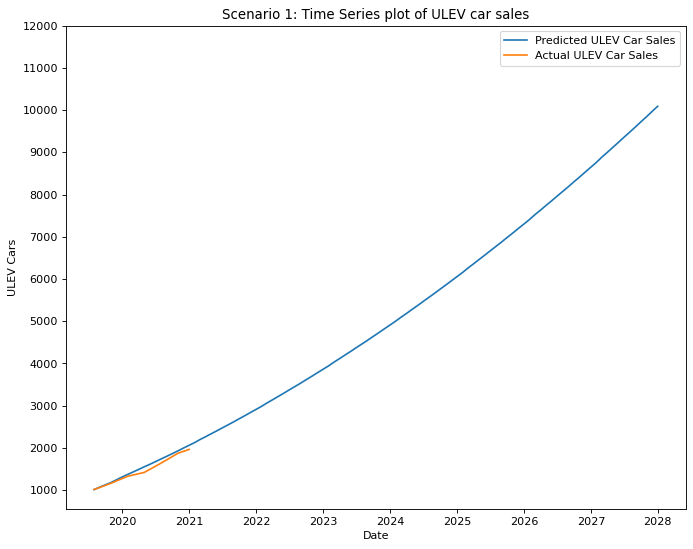

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.plot((df_results["ULEV_forecast"]).astype(int))
plt.plot(df_test["ULEV"][-nobs:])
plt.xlabel("Date")
plt.ylabel("ULEV Cars")
plt.title("Scenario 1: Time Series plot of ULEV car sales")
plt.legend(['Predicted ULEV Car Sales', 'Actual ULEV Car Sales'])
y_ticks=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000]
y_labels=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000]
plt.yticks(ticks=y_ticks,labels=y_labels)
plt.show()

In [28]:
charging_points_120_no_grants=df_results["ULEV_forecast"].astype(int)

In [29]:
charging_points_120_no_grants.to_csv("charging_points_100_no_grants.csv")